# Kmeans Tutorial

## Introduction


## Start H2O-3 cluster
_**Note**: The `os.system` command below is used solely for the H2O Aquarium training platform._

In [2]:
import os
os.system('/home/h2o/bin/startup')
!sleep 10

Start by importing `h2o` and creating a connection to the server. The parameters used in `h2o.init` will depend on your specific environment.

In [3]:
import h2o
h2o.init(url='http://localhost:54321/h2o')

Checking whether there is an H2O instance running at http://localhost:54321/h2o . connected.


H2O cluster uptime:,54 mins 26 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.2
H2O cluster version age:,"28 days, 13 hours and 23 minutes"
H2O cluster name:,h2o
H2O cluster total nodes:,1
H2O cluster free memory:,13.47 Gb
H2O cluster total cores:,16
H2O cluster allowed cores:,16
H2O cluster status:,"locked, healthy"


Note: The method you use for starting and stopping an H2O-3 cluster will depend on how H2O is installed and configured on your system. Regardless of how H2O is installed, if you start a cluster, you will need to ensure that it is shut down when you are done.

In [4]:
from h2o.estimators.kmeans import H2OKMeansEstimator
import pylab as pl

In [5]:
iris = h2o.import_file(path="./iris_wheader.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [6]:
iris

sepal_len,sepal_wid,petal_len,petal_wid,class
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa


In [7]:
iris.describe()

Rows:150
Cols:5




,sepal_len,sepal_wid,petal_len,petal_wid,class
type,real,real,real,real,enum
mins,4.3,2.0,1.0,0.1,
mean,5.843333333333333,3.053999999999999,3.758666666666667,1.1986666666666665,
maxs,7.9,4.4,6.9,2.5,
sigma,0.8280661279778637,0.43359431136217375,1.764420419952262,0.7631607417008414,
zeros,0,0,0,0,
missing,0,0,0,0,0
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [8]:
import seaborn as sns
import pandas as pd

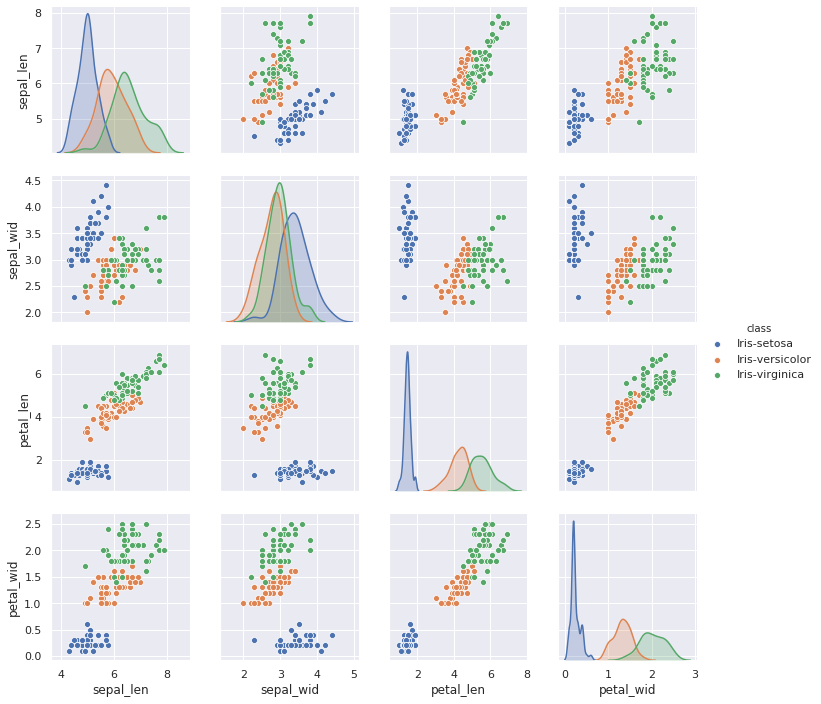

In [9]:
%matplotlib inline
sns.set()

sns.set_context("notebook")
sns.pairplot(iris.as_data_frame(True), vars=["sepal_len", "sepal_wid", "petal_len", "petal_wid"], hue="class");

In [10]:
results = [H2OKMeansEstimator(k=clusters, init="Random", seed=2, standardize=True) for clusters in range(2,13)]
for estimator in results:
    estimator.train(x=iris.col_names[0:-1], training_frame = iris)

kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%


In [11]:
estimator_auto = H2OKMeansEstimator(k=100, estimate_k=True, init="Random", seed=2, standardize=True, )
estimator_auto.train(x=iris.col_names[0:-1], training_frame = iris)

kmeans Model Build progress: |████████████████████████████████████████████| 100%


In [12]:
estimator_auto

Model Details
H2OKMeansEstimator :  K-means
Model Key:  KMeans_model_python_1566646477762_12

Model Summary: 


,number_of_rows,number_of_clusters,number_of_categorical_columns,number_of_iterations,within_cluster_sum_of_squares,total_sum_of_squares,between_cluster_sum_of_squares
,150.0,2.0,0.0,5.0,222.2404590,596.0,373.7595410




ModelMetricsClustering: kmeans
** Reported on train data. **

MSE: NaN
RMSE: NaN
Total Within Cluster Sum of Square Error: 222.24046004386403
Total Sum of Square Error to Grand Mean: 595.99999900835
Between Cluster Sum of Square Error: 373.75953896448596
Centroid Statistics: 


,centroid,size,within_cluster_sum_of_squares
,1.0,100.0,174.0821500
,2.0,50.0,48.1583100


Scoring History: 


,timestamp,duration,iterations,number_of_clusters,number_of_reassigned_observations,within_cluster_sum_of_squares
,2019-08-24 12:15:18,0.002 sec,0.0,0.0,nan,nan
,2019-08-24 12:15:18,0.003 sec,1.0,1.0,150.0,776.9198623
,2019-08-24 12:15:18,0.003 sec,2.0,1.0,0.0,596.0000000
,2019-08-24 12:15:18,0.009 sec,3.0,2.0,31.0,364.1930009
,2019-08-24 12:15:18,0.009 sec,4.0,2.0,2.0,222.7177092
,2019-08-24 12:15:18,0.010 sec,5.0,2.0,0.0,222.2404590


In [13]:
estimator = H2OKMeansEstimator(k=4, init="Random", seed=2, standardize=True)
estimator.train(x=iris.col_names[0:-1], training_frame = iris)

kmeans Model Build progress: |████████████████████████████████████████████| 100%


In [14]:
print(estimator.predict_leaf_node_assignment)

Model Details
H2OKMeansEstimator :  K-means
Model Key:  KMeans_model_python_1566646477762_13

Model Summary: 


,number_of_rows,number_of_clusters,number_of_categorical_columns,number_of_iterations,within_cluster_sum_of_squares,total_sum_of_squares,between_cluster_sum_of_squares
,150.0,4.0,0.0,6.0,113.7875022,596.0,482.2124978




ModelMetricsClustering: kmeans
** Reported on train data. **

MSE: NaN
RMSE: NaN
Total Within Cluster Sum of Square Error: 113.78750272105724
Total Sum of Square Error to Grand Mean: 595.99999900835
Between Cluster Sum of Square Error: 482.2124962872927
Centroid Statistics: 


,centroid,size,within_cluster_sum_of_squares
,1.0,44.0,43.4763401
,2.0,26.0,9.8031250
,3.0,24.0,11.9295374
,4.0,56.0,48.5785002


Scoring History: 


,timestamp,duration,iterations,number_of_reassigned_observations,within_cluster_sum_of_squares
,2019-08-24 12:15:25,0.001 sec,0.0,nan,nan
,2019-08-24 12:15:25,0.002 sec,1.0,150.0,217.4382746
,2019-08-24 12:15:25,0.003 sec,2.0,32.0,153.5126770
,2019-08-24 12:15:25,0.003 sec,3.0,8.0,115.5520631
,2019-08-24 12:15:25,0.004 sec,4.0,2.0,114.1098688
,2019-08-24 12:15:25,0.004 sec,5.0,1.0,113.8440088
,2019-08-24 12:15:25,0.004 sec,6.0,0.0,113.7875022


<bound method ModelBase.predict_leaf_node_assignment of >


In [15]:
estimator.predict

Model Details
H2OKMeansEstimator :  K-means
Model Key:  KMeans_model_python_1566646477762_13

Model Summary: 


,number_of_rows,number_of_clusters,number_of_categorical_columns,number_of_iterations,within_cluster_sum_of_squares,total_sum_of_squares,between_cluster_sum_of_squares
,150.0,4.0,0.0,6.0,113.7875022,596.0,482.2124978




ModelMetricsClustering: kmeans
** Reported on train data. **

MSE: NaN
RMSE: NaN
Total Within Cluster Sum of Square Error: 113.78750272105724
Total Sum of Square Error to Grand Mean: 595.99999900835
Between Cluster Sum of Square Error: 482.2124962872927
Centroid Statistics: 


,centroid,size,within_cluster_sum_of_squares
,1.0,44.0,43.4763401
,2.0,26.0,9.8031250
,3.0,24.0,11.9295374
,4.0,56.0,48.5785002


Scoring History: 


,timestamp,duration,iterations,number_of_reassigned_observations,within_cluster_sum_of_squares
,2019-08-24 12:15:25,0.001 sec,0.0,nan,nan
,2019-08-24 12:15:25,0.002 sec,1.0,150.0,217.4382746
,2019-08-24 12:15:25,0.003 sec,2.0,32.0,153.5126770
,2019-08-24 12:15:25,0.003 sec,3.0,8.0,115.5520631
,2019-08-24 12:15:25,0.004 sec,4.0,2.0,114.1098688
,2019-08-24 12:15:25,0.004 sec,5.0,1.0,113.8440088
,2019-08-24 12:15:25,0.004 sec,6.0,0.0,113.7875022


<bound method ModelBase.predict of >

In [16]:
predicted = estimator.predict(iris)

kmeans prediction progress: |█████████████████████████████████████████████| 100%


In [17]:
predicted

predict
2
1
1
1
2
2
1
1
1
1


In [18]:
iris["Predicted"] = predicted["predict"].asfactor()

In [19]:
iris.head

sepal_len,sepal_wid,petal_len,petal_wid,class,Predicted
5.1,3.5,1.4,0.2,Iris-setosa,2
4.9,3,1.4,0.2,Iris-setosa,1
4.7,3.2,1.3,0.2,Iris-setosa,1
4.6,3.1,1.5,0.2,Iris-setosa,1
5,3.6,1.4,0.2,Iris-setosa,2
5.4,3.9,1.7,0.4,Iris-setosa,2
4.6,3.4,1.4,0.3,Iris-setosa,1
5,3.4,1.5,0.2,Iris-setosa,1
4.4,2.9,1.4,0.2,Iris-setosa,1
4.9,3.1,1.5,0.1,Iris-setosa,1


<bound method H2OFrame.head of >

In [20]:
iris['Predicted']

Predicted
2
1
1
1
2
2
1
1
1
1


In [21]:
iris.describe()

Rows:150
Cols:6




,sepal_len,sepal_wid,petal_len,petal_wid,class,Predicted
type,real,real,real,real,enum,enum
mins,4.3,2.0,1.0,0.1,,
mean,5.843333333333333,3.053999999999999,3.758666666666667,1.1986666666666665,,
maxs,7.9,4.4,6.9,2.5,,
sigma,0.8280661279778637,0.43359431136217375,1.764420419952262,0.7631607417008414,,
zeros,0,0,0,0,,
missing,0,0,0,0,0,0
0,5.1,3.5,1.4,0.2,Iris-setosa,2
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1


In [22]:
type(iris)

h2o.frame.H2OFrame

In [23]:
iris.__class__

h2o.frame.H2OFrame

In [24]:
iris1 = h2o.as_list(iris)

In [25]:
type(iris1)

pandas.core.frame.DataFrame

In [26]:
iris1

,sepal_len,sepal_wid,petal_len,petal_wid,class,Predicted
0,5.1,3.5,1.4,0.2,Iris-setosa,2
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,2
5,5.4,3.9,1.7,0.4,Iris-setosa,2
6,4.6,3.4,1.4,0.3,Iris-setosa,1
7,5.0,3.4,1.5,0.2,Iris-setosa,1
8,4.4,2.9,1.4,0.2,Iris-setosa,1
9,4.9,3.1,1.5,0.1,Iris-setosa,1


In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

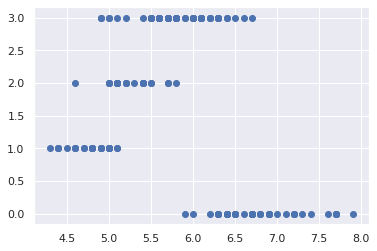

In [28]:
plt.scatter(iris1['sepal_len'], iris1['Predicted'])

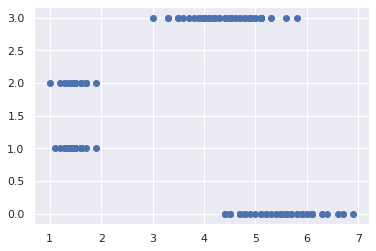

In [29]:
plt.scatter(iris1['petal_len'], iris1['Predicted'])

In [30]:
colors = np.random.rand(50)
color = iris1['Predicted']
a = iris1['Predicted']

In [31]:
a1 = iris1.Predicted.unique()
print(a1)
print(len(a1))

[2 1 0 3]
4


In [32]:
area=iris1.petal_len  # Try with petal_len/petal_len
#the petal_wid are very small so lets make them bigger
area=area*50

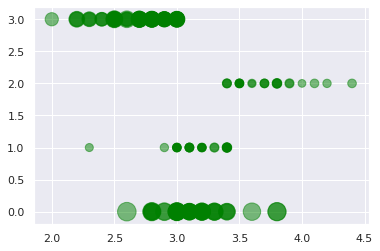

In [33]:
plt.scatter(iris1['sepal_wid'], iris1['Predicted'], c='green', s=area , alpha=0.5)

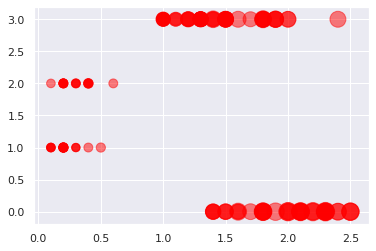

In [34]:
plt.scatter(iris1['petal_wid'], iris1['Predicted'], c='red', s=area , alpha=0.5)

In [35]:
iris1.describe()

,sepal_len,sepal_wid,petal_len,petal_wid,Predicted
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.613333
std,0.828066,0.433594,1.764420,0.763161,1.257390
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


In [4]:
h2o.cluster().shutdown()

H2O session _sid_9816 closed.


Fill in some final words here